<b>Тема “Обучение с учителем”</b>

<b>Задание 1</b>
Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

# Reading the required data:-----------------------------------------------
boston = load_boston()
#print("log: boston ds: {}".format(boston))
print("log: boston shape: {}, data: {}".format(boston.data.shape,boston.feature_names))

# Making the data frame from loaded:---------------------------------------
X = pd.DataFrame(boston.data,columns=boston.feature_names)
print("log: x-head: {}".format(X.head()))
print("log: x-info: {}".format(X.info()))
print("log: x-describe: {}".format(X.describe()))
Y = pd.DataFrame(boston.target, columns=['price'])
print("log: y-info: {}".format(Y.info()))


C:\Users\Alex\DevProgs\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

log: boston shape: (506, 13), data: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
log: x-head:       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64


In [2]:
# Making train sets:-------------------------------------------------------
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=42)
print ("log: size: {} , {} , {} , {}".format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

# Making linear regression:------------------------------------------------
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)


log: size: (354, 13) , (152, 13) , (354, 1) , (152, 1)


In [3]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred) #, force_finite=False)
print ("log: r2={}".format(r2))

log: r2=0.711226005748496


<b>Задание 2</b>
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [4]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000,max_depth=12,random_state=42)


y_train_regressor = y_train.values[:,0]
# print ("log: x_train={} y_train={}".format(x_train,y_train_regressor))
model.fit(x_train,y_train_regressor)
y_pred = lin_reg.predict(x_test)

r2 = r2_score(y_test,y_pred)
print("log: r2={}".format(r2))

log: r2=0.711226005748496


<b>*Задание 3</b>
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


In [5]:
print ("log: feature_importance={}".format(model.feature_importances_))

log: feature_importance=[0.03167574 0.00154252 0.00713813 0.00123624 0.01426897 0.40268179
 0.01429864 0.06397257 0.00528122 0.01152493 0.01808108 0.01245085
 0.41584732]


In [6]:
feature_importance_array=np.array(model.feature_importances_)
print("log: normalized sum={}".format(feature_importance_array.sum()))
for inex in range(0,feature_importance_array.shape[0]):
    if feature_importance_array[inex]>0.2:
        print ("  --> The most effective data: {}".format(X.columns[inex]))


log: normalized sum=1.0
  --> The most effective data: RM
  --> The most effective data: LSTAT


<b>*Задание 4</b>
В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.</br>
1) Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.</br>
2) Загрузите датасет creditcard.csv и создайте датафрейм df. С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована. Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
pd.options.display.max_columns = 100.
Просмотрите первые 10 строк датафрейма df.</br>
3) Создайте датафрейм X из датафрейма df, исключив столбец Class.
Создайте объект Series под названием y из столбца Class.</br>
Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.
У вас должны получиться объекты X_train, X_test, y_train и y_test.
Просмотрите информацию о их форме.</br>
4) Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]
Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3.</br>
5) Обучите модель на тренировочном наборе данных (может занять несколько минут).
Просмотрите параметры лучшей модели с помощью атрибута best_params_.
Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.


log: control map {'284807': 'Class'} -> length=1
log: value counts: Class
0        0.998273
1        0.001727
dtype: float64
log: size: (199364, 30) , (85443, 30) , (199364,) , (85443,)
log: best params: {'max_depth': 6, 'max_features': 3, 'n_estimators': 15}
log: selected best params: {'max_depth': 6, 'max_features': 3, 'n_estimators': 15, 'random_state': 100} from {'max_depth': 6, 'max_features': 3, 'n_estimators': 15}
log: fall out: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.17240166e-05 1.17240166e-05
 2.34480333e-05 2.34480333e-05 2.34480333e-05 2.34480333e-05
 3.51720499e-05 3.51720499e-05 4.68960666e-05 4.68960666e-05
 5.86200832e-05 5.86200832e-05 7.03440999e-05 7.03440999e-05
 1.17240166e-04 1.17240166e-04 1.28964183e-04 1.28964183e-04
 1.40688200

Text(0.5, 1.0, 'Receiver operating characteristic (ROC')

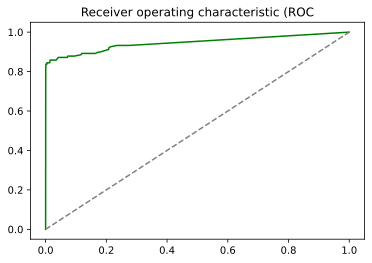

In [7]:
# Additional functions:-------------------------------------------------------------
def trim_string_array (array):
    new_array=[]
    for item in array:
        if len(item)>0:
            new_array.append(item)
    return new_array

def split_by_new_line (text):
    return text.split('\n')

def split_by_empty (text):
    return text.split(' ')

def make_info_data_frame (data_frame):
    import io
    buffer = io.StringIO()
    data_frame.info(buf=buffer)
    splitted = split_by_new_line(buffer.getvalue())
    # extracting columns from the strings:--------------------
    columns = trim_string_array(split_by_empty(splitted[3]))
    # extracting data from the strings:-----------------------
    data=[]
    for index in range(5,len(splitted)-3):
        data.append(trim_string_array(split_by_empty(splitted[index])))
    # making the new data frame with info:--------------------
    return pd.DataFrame(data=data,columns=columns)

def assert_non_null_data_frame_values (data_frame):
    data_frame_info = make_info_data_frame(data_frame)
    null_control_map = {}
    for non_null, column in zip(data_frame_info['Non-Null'],data_frame_info['Column']):
        null_control_map[non_null]=column
    null_control_map_length = len(null_control_map);
    print("log: control map {} -> length={}".format(null_control_map,null_control_map_length))
    assert(null_control_map_length==1)
    
def assert_not_balanced_data_frame (data_frame):
    value_counts = data_frame.value_counts(subset=['Class'],normalize=True)
    print("log: value counts: {}".format(value_counts))
    assert(value_counts[0]>value_counts[1])
    
def make_plotter ():
    import matplotlib.pyplot as plt
    %config InlineBackend.figure_format = 'svg'
    %matplotlib inline
    return plt
#-----------------------(additional functions)--------------------------------------



from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


# Reading:-----------------------------------------------------
origin_data_frame = pd.read_csv('./creditcard.csv', sep=',')

# Asserting:---------------------------------------------------
assert_non_null_data_frame_values(origin_data_frame)
assert_not_balanced_data_frame(origin_data_frame)

# Selecting:---------------------------------------------------
X = origin_data_frame.drop(columns='Class',inplace=False)
Y = origin_data_frame['Class']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=100,stratify=Y)
print ("log: size: {} , {} , {} , {}".format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

# Making classifiers:-----------------------------------------
parameters = [{'n_estimators': [10, 15],'max_features': np.arange(3, 5),'max_depth': np.arange(4, 7)}]
classifier = RandomForestClassifier(random_state=100)
grid_search = GridSearchCV(estimator=classifier,param_grid=parameters,scoring='roc_auc',cv=3)

# Fitting and testing:----------------------------------------
grid_search.fit(x_train,y_train)

# Selecting best params:--------------------------------------
print ("log: best params: {}".format(grid_search.best_params_))
new_best_params = dict(grid_search.best_params_)
new_best_params['random_state']=100
print ("log: selected best params: {} from {}".format(new_best_params,grid_search.best_params_))

# Recreating classifier:--------------------------------------
classifier = RandomForestClassifier(max_depth=new_best_params['max_depth'],
                                    max_features=new_best_params['max_features'],
                                    n_estimators=new_best_params['n_estimators'],
                                    random_state=new_best_params['random_state']
                                   )
classifier.fit(x_train,y_train)
y_pred_probability=classifier.predict_proba(x_test)


# Calculating ROC:--------------------------------------------
from sklearn.metrics import roc_curve
y_pred_probability = y_pred_probability[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_probability)
print ("log: fall out: {}".format(fpr)) # fpr = FP/(FP+TN) - FALL OUT
print ("log: recall: {}".format(tpr)) # tpr = TP/(TP+FN) - RECALL or SENSITIVITY
#print (thresholds) # пороги вероятности


# Plotting:---------------------------------------------------
plotter = make_plotter()
#plotter.hist(y_pred_probability[y_test==0],bins=7,density=True,alpha=0.5)
#plotter.hist(y_pred_probability[y_test==1],bins=7,density=True,alpha=0.5)
plotter.plot(fpr,tpr,color='green',label="ROC curve")
plotter.plot([0,1],[0,1],color='grey',linestyle='--')
plotter.title("Receiver operating characteristic (ROC")



<b>*Дополнительные задания:</b>
1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.


In [8]:
from sklearn.datasets import load_wine
data = load_wine()
print ('log: wine: {}'.format(data))

log: wine: {'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

In [9]:
data_keys=data.keys()
print("log: extracted data keys: {}".format(data_keys))

log: extracted data keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.

In [10]:
description = data.DESCR
print("log: data set description: {}".format(description))

log: data set description: .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alca

4). Сколько классов содержит целевая переменная датасета? Выведите названия классов.


In [11]:

print('log: class names: {}'.format(data.target_names))
print('log: class quantity: {}'.format(len(data.target_names)))

log: class names: ['class_0' 'class_1' 'class_2']
log: class quantity: 3


5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X

In [12]:
X = pd.DataFrame(data=data.data, columns=data.feature_names)
X.head(100)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625.0
97,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0


6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

In [13]:
# assert if some nulls are present:----------------------------------
assert_non_null_data_frame_values(X)

# showing data frame info as the new pandas data frame:--------------
make_info_data_frame(X)

log: control map {'178': 'proline'} -> length=1


,#,Column,Non-Null,Count,Dtype
0,0,alcohol,178,non-null,float64
1,1,malic_acid,178,non-null,float64
2,2,ash,178,non-null,float64
3,3,alcalinity_of_ash,178,non-null,float64
4,4,magnesium,178,non-null,float64
5,5,total_phenols,178,non-null,float64
6,6,flavanoids,178,non-null,float64
7,7,nonflavanoid_phenols,178,non-null,float64
8,8,proanthocyanins,178,non-null,float64
9,9,color_intensity,178,non-null,float64


7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.

In [14]:
X['target']=data.target
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.

In [15]:
x_correlation_matrix = X.corr()
#print('log: correlation matrix: {}'.format(x_correlation_matrix))
X_corr=pd.DataFrame(data=x_correlation_matrix,columns=X.columns)
X_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).

In [30]:

selected_by_value = X_corr[abs(X_corr['target'])>0.5 ]
high_corr = selected_by_value[~(selected_by_value['target'].index=='target')]
high_corr


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
hue,-0.071747,-0.561296,-0.074667,-0.273955,0.055398,0.433681,0.543479,-0.262640,0.295544,-0.521813,1.000000,0.565468,0.236183,-0.617369
od280/od315_of_diluted_wines,0.072343,-0.368710,0.003911,-0.276769,0.066004,0.699949,0.787194,-0.503270,0.519067,-0.428815,0.565468,1.000000,0.312761,-0.788230
proline,0.643720,-0.192011,0.223626,-0.440597,0.393351,0.498115,0.494193,-0.311385,0.330417,0.316100,0.236183,0.312761,1.000000,-0.633717


10). Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.


In [37]:
# droping target var:--------------------------------------------
#X=X.drop(columns='target')

# high_corr^2:---------------------------------------------------
for high_corr_property_name in high_corr.index:
    print("log: analyzing property with name=: {}".format(high_corr_property_name))
    new_prop_name = high_corr_property_name+'_2';
    X[new_prop_name]=X[high_corr_property_name]**2
    
X.describe()
    


log: analyzing property with name=: alcalinity_of_ash
log: analyzing property with name=: total_phenols
log: analyzing property with name=: flavanoids
log: analyzing property with name=: hue
log: analyzing property with name=: od280/od315_of_diluted_wines
log: analyzing property with name=: proline


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,391.142865,5.657030,5.110049,0.968661,7.322155,6.564591e+05
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,133.671775,2.936294,4.211441,0.443798,3.584316,5.558591e+05
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,112.360000,0.960400,0.115600,0.230400,1.612900,7.728400e+04
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,295.840000,3.036325,1.452100,0.612325,3.754075,2.505010e+05
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,380.250000,5.546050,4.558250,0.931250,7.728400,4.536045e+05
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,462.250000,7.840000,8.265700,1.254400,10.048900,9.702250e+05
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,900.000000,15.054400,25.806400,2.924100,16.000000,2.822400e+06
